In [ ]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
#read the kpca data
df_kpca = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/DataKPCA.csv')

In [ ]:
df_kpca.shape

(190, 7)

##Visualization

1. Density plots of individual dimensions

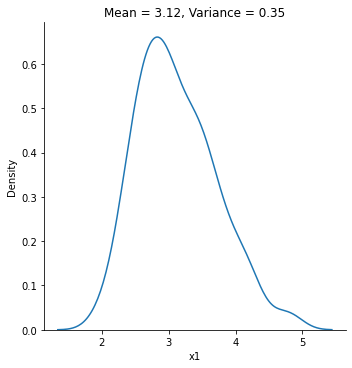

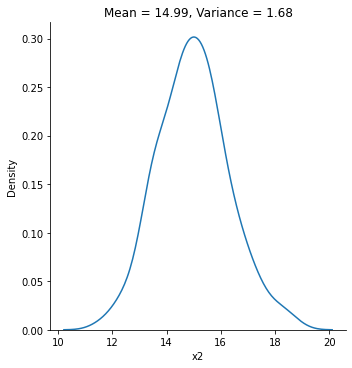

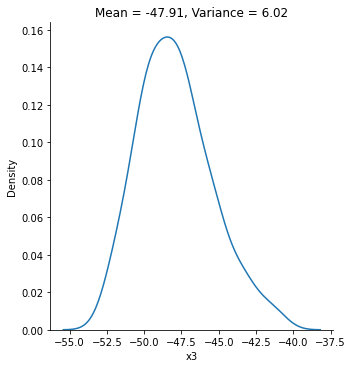

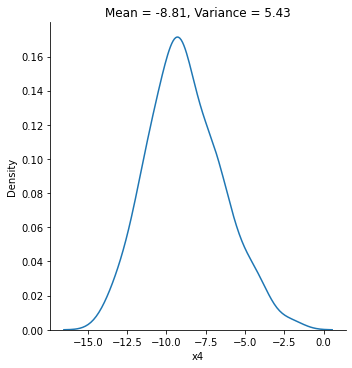

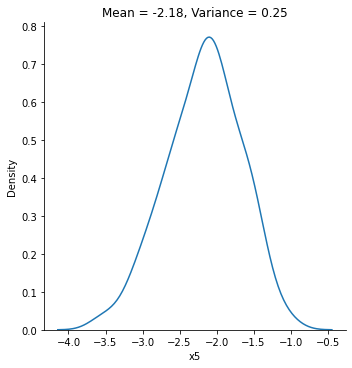

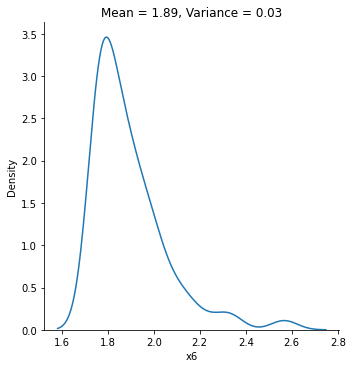

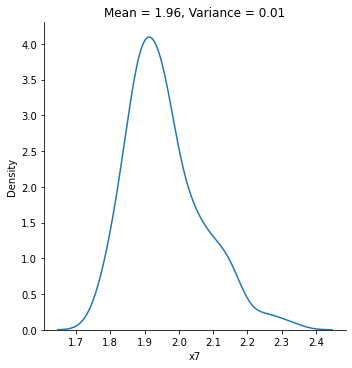

In [ ]:
for i in range(0, df_kpca.shape[1]):
  df = df_kpca.iloc[:, i]
  sns.displot(df, kind = 'kde')
  plt.title('Mean = {}, Variance = {}'.format(np.round(np.mean(df), 2) , np.round(np.var(df), 2)))
  plt.show()

Observation : Mean and Ranges of various dimensions are significantly different.

2. Some Pair-wise scatter plots

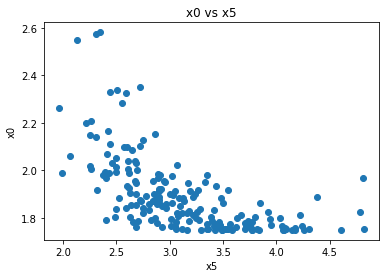

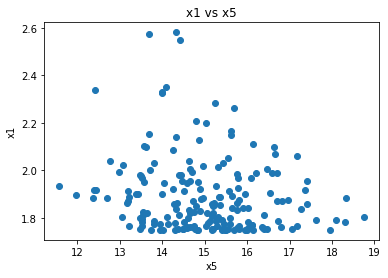

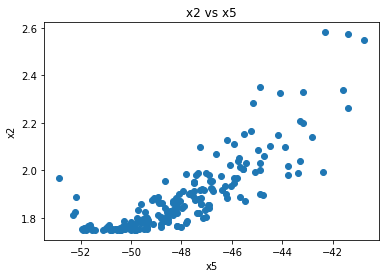

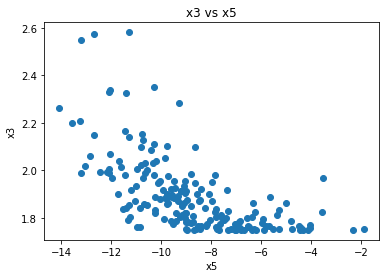

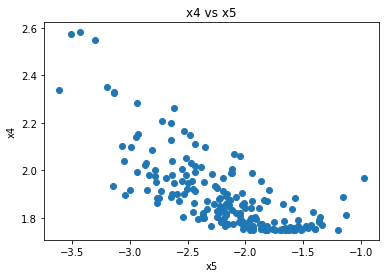

In [ ]:
for l in range(0, 5):
  plt.scatter(df_kpca.iloc[:,l], df_kpca.iloc[:,5])
  plt.title('x{} vs x5'.format(l))
  plt.xlabel('x5')
  plt.ylabel('x{}'.format(l))
  plt.show()

Observation: These pairwise scatter plots hint at the data points lying along a low dimensional non-linear manifold.

## Kernel PCA

### 1. Defining the kernel
---


We will use the default gaussian rbf kernel.

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.rbf_kernel.html

In [ ]:
#import the rbf_kernel from sklearn
from sklearn.metrics.pairwise import rbf_kernel

In [ ]:
# cast the dataframe into a numpy array for further calculations
Z = np.array(df_kpca)
Z.shape

(190, 7)

Note : 
* For defining the rbf kernel, we will use the rbf_kernel function provided by sklearn. Initally we will just go ahead with the default value of gamma.

* We will revisit this and try for different gamma ony if we don't get satisfactory dimension reduction with the default value.

In [ ]:
# rbf_kernel computes the NxN kernel matrix for given dataset of NxD containing N D-dimensional points.
# default gamma value (1/n_features) is used
K = rbf_kernel(Z)

### 2. Centering the kernel matrix
---
$K' = K - \textbf{1}_{N}.K - K.\textbf{1}_{N} + \textbf{1}_{N}.K.\textbf{1}_{N}$

where $\textbf{1}_{N}$ is a $N\times N$ matrix of all ones.

Ref : https://sebastianraschka.com/Articles/2014_kernel_pca.html#1-computation-of-the-kernel-similarity-matrix

In [ ]:
#ones_N is a NxN matrix of all ones
ones_N = np.ones(K.shape)
# use the above equation to obtain centered kernel matrix K_centered
K_centered = K - np.dot(ones_N, K) - np.dot(K, ones_N) + np.dot(ones_N, np.dot(K, ones_N))

###3. Eigendecomposition of the centered kernel matrix
---


Ref : https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html

In [ ]:
# eigh is used since K is symmetric matrix
# eigh returns the eigen values and eigen vectors in the ascending order of the eigenvalues
eigenvals, eigenvecs = np.linalg.eigh(K_centered)

# Define w and V to represent eigen values and eigen vectors in descending order of eigenvalues
w, V = eigenvals[::-1], eigenvecs[:, ::-1]

* Kernel PCA is trained using gaussian rbf kernel on the given data. The projections of the given data points along kPCA axis ' i ' are given as $\sqrt\lambda_{i}.V [:, i]$ .


* The Eigenvector matrix V and eigenvalues w can now be used to compute the projection of a new test vector x as follows: $x_{\text{projected on axis i}} = k.V[:,i].\lambda_{i}^{-1/2}$, 

where k = [ kernel(x, x1), kernel(x, x2), ... , kernel(x, xN) ] ,  

and $kernel(x,xj) = exp(-γ.||x - x_{j}||_{2}^{2})$ 

Ref: https://stats.stackexchange.com/questions/126014/how-to-project-a-new-vector-onto-the-pc-space-using-kernel-pca

### 4. Plotting Variance explained vs kPCA dimensions
---

In [ ]:
#let var10 denote variance explained (%) for the first 10 dimensions
var10 = 100*w[0:10]/np.sum(w)

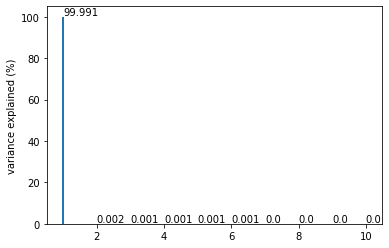

In [ ]:
# x = 1 to 10 denote the first 10 kPCA dimensions
x = np.arange(1, 11)
# make a bar plot for variance explained vs first 10 kPCA dimensions
plt.bar(x, var10, width = 0.05)
# annotate every bar with the value of the corresponding height
for a,b in zip(x, np.round(var10,3)): 
    plt.annotate(str(b), xy=(a,b+0.75)) # first arg denote the value to annotate with
                                        # second argument denote the position of annotation

plt.ylabel('variance explained (%)')
plt.show()


Ref for annotating the bars : https://stackoverflow.com/questions/6282058/writing-numerical-values-on-the-plot-with-matplotlib

Lets further magnify the plot for kPCA dimensions 2 to 10 for better visualization

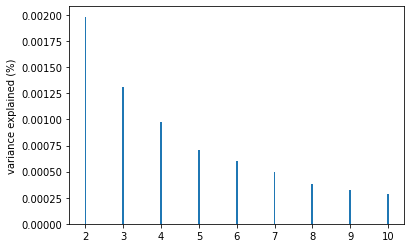

In [ ]:
x2 = np.arange(2, 11)
plt.bar(x2, var10[1:], width = 0.05)

plt.ylabel('variance explained (%)')
plt.show()

Observation: Almost all the variane is explained by the first kPCA dimensions. Contribution of other dimensions is simply negligible. 

Conclusion : The given dataset of 7-D points can be almost completely represented as their projections along the first kPCA dimension.